### SHARSOUT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

### import sharesout

In [2]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_shares_out.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_sharesout = pd.read_csv(StringIO(csv_string))
df_sharesout.index = df_sharesout['Unnamed: 0']
df_sharesout = df_sharesout.drop('Unnamed: 0', axis=1)
df_sharesout.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_sharesout = df_sharesout.T
df_sharesout.index = pd.to_datetime(df_sharesout.index)
df_sharesout.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,T_A T & T CORP,ADM_ARCHER DANIELS MIDLAND CO,FRC_FIRST REPUBLIC BANK S F,FISV_FISERV INC,CF_CHARTER ONE FINANCIAL INC,PHBK_PEOPLES HERITAGE FINL GROUP INC,...,CDB_CANANDAIGUA BRANDS,STZ_CONSTELLATION BRANDS INC,VIA_VIACOM INC,FCX_FREEPORT MCMORAN INC,IT_GARTNER INC,PLD_PROLOGIS TRUST,DVA_DAVITA,TAP_TRAVELERS PPTY CASUALTY CORP,V_VIVENDI UNIVERSAL,CMG_CHIPOTLE MEXICAN GRILL INC
2000-01-03,1423672.0,5160025.0,120678.0,789233.0,3195346.0,608360.0,9171.0,122639.0,212171.0,102182.0,...,108600.0,NaN,1762299.0,727500.0,1006700.0,189400.0,NaN,291900.0,NaN,NaN
2000-01-04,1423672.0,5160025.0,120678.0,789233.0,3195346.0,608360.0,9171.0,122639.0,212171.0,102182.0,...,155000.0,NaN,1871299.0,809100.0,631500.0,110200.0,NaN,394200.0,NaN,NaN
2000-01-05,1423672.0,5160025.0,120678.0,789233.0,3195346.0,608360.0,9171.0,122639.0,212171.0,102182.0,...,275600.0,NaN,2265199.0,767800.0,470400.0,170700.0,NaN,366900.0,NaN,NaN
2000-01-06,1423672.0,5160025.0,120678.0,789233.0,3195346.0,608360.0,9171.0,122639.0,212171.0,102182.0,...,159200.0,NaN,3235500.0,1148299.0,466400.0,537900.0,NaN,673000.0,NaN,NaN
2000-01-07,1423672.0,5160025.0,120678.0,789233.0,3195346.0,608360.0,9171.0,122639.0,212171.0,102182.0,...,84700.0,NaN,2464799.0,1126199.0,445700.0,692500.0,NaN,530600.0,NaN,NaN


## SHARES/DOLLAR metric?

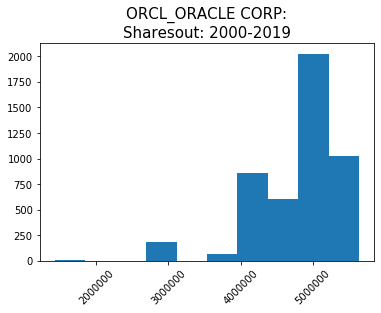

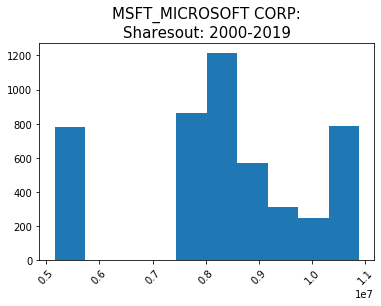

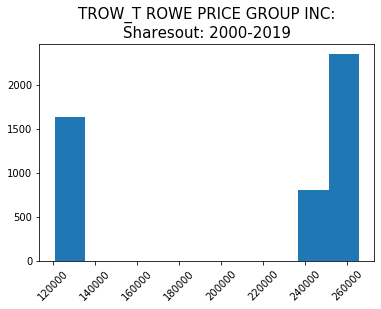

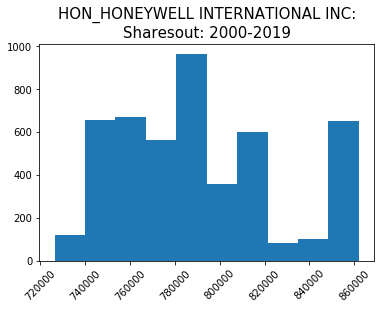

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


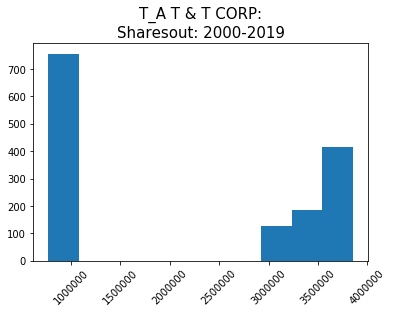

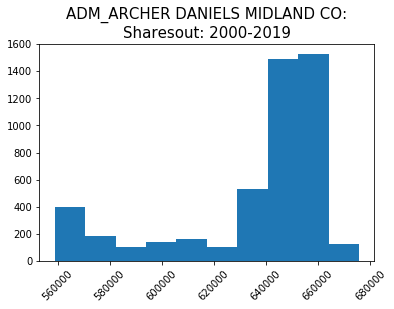

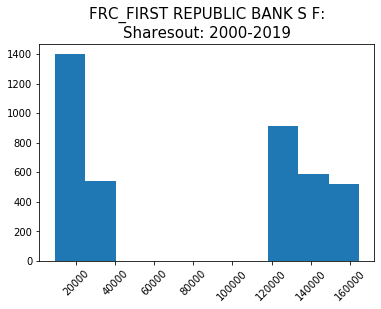

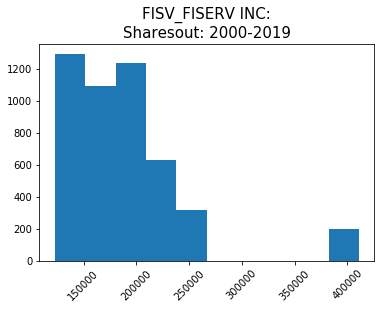

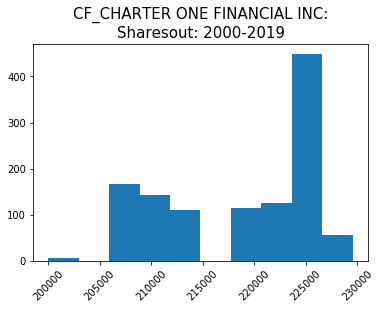

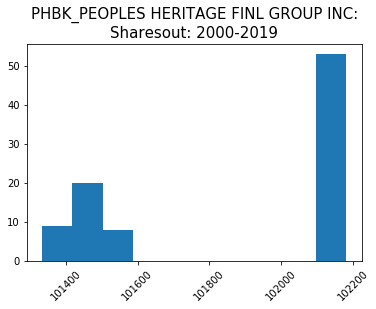

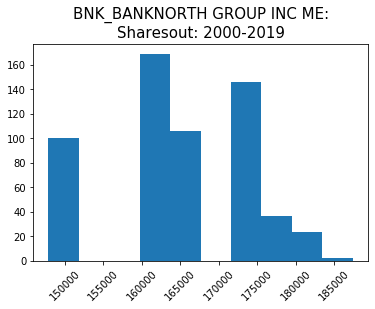

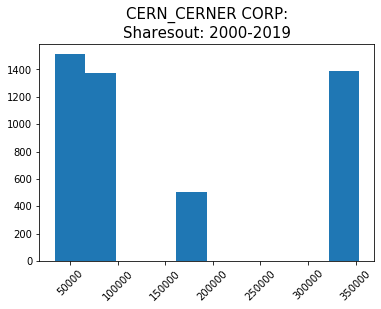

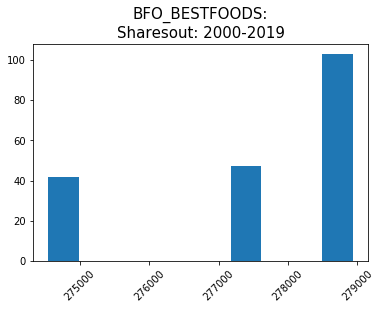

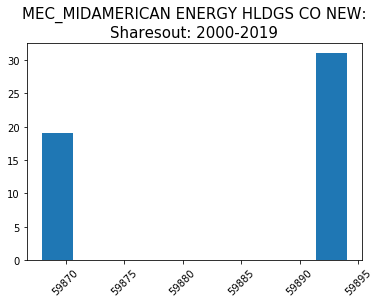

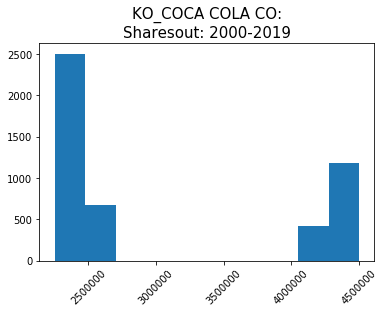

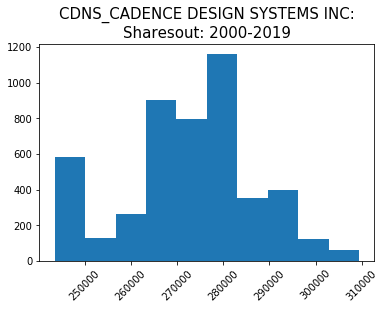

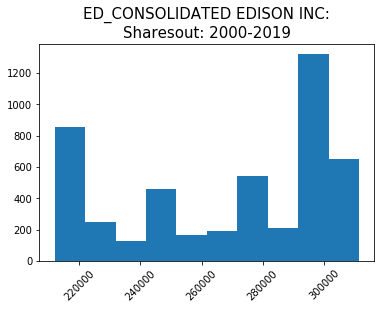

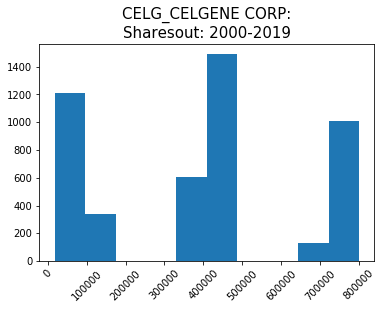

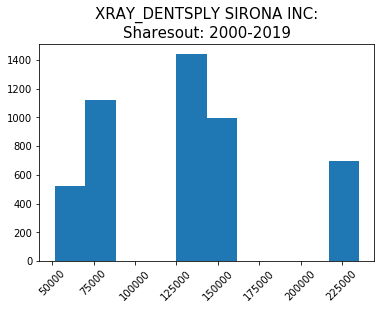

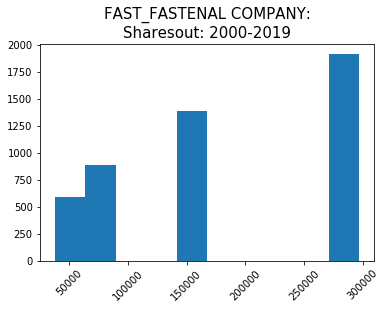

In [3]:
key_list = df_sharesout.columns

for company in key_list[:20]:
    fig, ax = plt.subplots()
    ax.hist(df_sharesout[company])
    plt.xticks(rotation=45)
    plt.title('{}:\nSharesout: 2000-2019'.format(company), fontsize=15)
    plt.show()
    print('')
    print('')